In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Time-independent Schrodinger Equation of a confined quantum particle

https://lukepolsonphysicsblog.wordpress.com/2020/10/29/example-post-3/

$$ \begin{bmatrix}\frac{1}{\Delta y^2}+mL^2V_1 & -\frac{1}{2 \Delta y^2} &   0 & 0...\\ -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_2 & -\frac{1}{2 \Delta y^2} & 0... \\ ...& ... & ... & -\frac{1}{2 \Delta y^2}\\...0 & 0 & -\frac{1}{2 \Delta y^2} & \frac{1}{\Delta y^2}+mL^2V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = mL^2 E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$


Boundary conditions: $$ \psi_0 = \psi_N = 0$$

Main diagnal.
The off-diagnals are symetric.

# Solve the equations using Python

Define $N$ and $dy$

In [2]:
N  = 2000
dy = 1/N
y  = np.linspace(0, 1, N+1)

## Quadratic potential well

Define potential $mL^2 V$

In [3]:
# def mL2V(y):
#   return 1000*np.sin(20*y) * y**4 


def mL2V(y):
  return 1000*(y-0.5)**2

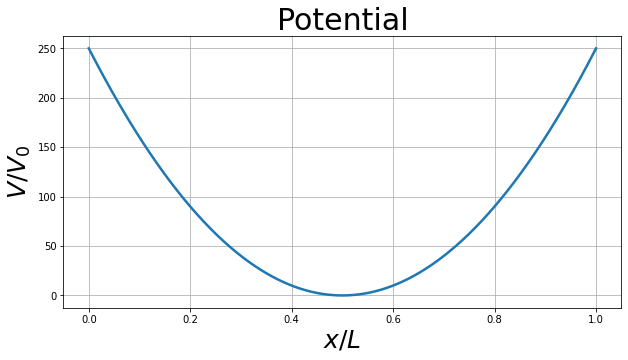

In [7]:
plt.figure(figsize=(10,5))
plt.plot(y, mL2V(y), lw=2.5)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.show()
# plt.savefig('', dpi=200)

In [9]:
d = 1/dy**2 + mL2V(y)[1:-1]           # Main diagnal
e = -1/(2*dy**2) * np.ones(len(d)-1)  # Off-diagnals (symetric)

In [12]:
print(d.shape)
d

(1999,)


array([4000249.50025, 4000249.001  , 4000248.50225, ..., 4000248.50225,
       4000249.001  , 4000249.50025])

In [13]:
print(e.shape)

(1998,)


In [14]:
w, v = eigh_tridiagonal(d, e)

In [15]:
# Eigen values (energy)
w.shape

(1999,)

In [16]:
# Eigen vectors
v.shape

(1999, 1999)

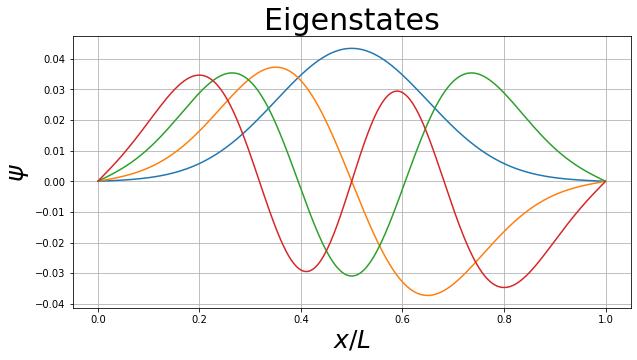

In [17]:
# Plot some eigen vectors
plt.figure(figsize=(10,5))

plt.plot(y[1:-1], v.T[0])
plt.plot(y[1:-1], v.T[1])
plt.plot(y[1:-1], v.T[2])
plt.plot(y[1:-1], v.T[3])

plt.title('Eigenstates', fontsize=30)
plt.ylabel('$\psi$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()

# plt.savefig('', dpi=200)
plt.show()

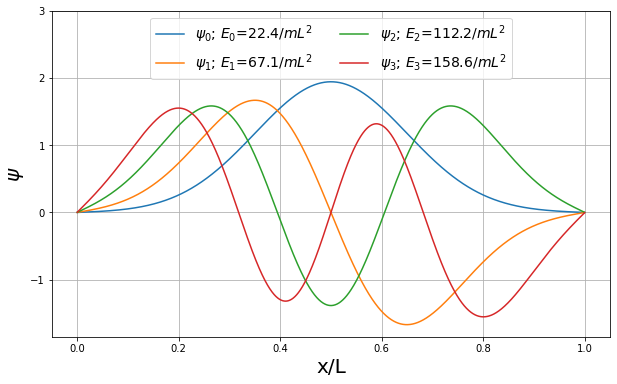

In [27]:
# Normalize Eigenfunction
plt.figure(figsize=(10,6))

v0 = 1 / np.sqrt(sum(v[:,0]**2)*dy) * v[:,0] 
v1 = 1 / np.sqrt(sum(v[:,1]**2)*dy) * v[:,1]
v2 = 1 / np.sqrt(sum(v[:,2]**2)*dy) * v[:,2] 
v3 = 1 / np.sqrt(sum(v[:,3]**2)*dy) * v[:,3]

# Plot
plt.plot(y[1:-1], v0, label='$\psi_0$; $E_0$={:.1f}$/mL^2$'.format(w[0]))
plt.plot(y[1:-1], v1, label='$\psi_1$; $E_1$={:.1f}$/mL^2$'.format(w[1]))
plt.plot(y[1:-1], v2, label='$\psi_2$; $E_2$={:.1f}$/mL^2$'.format(w[2]))
plt.plot(y[1:-1], v3, label='$\psi_3$; $E_3$={:.1f}$/mL^2$'.format(w[3]))
plt.xlabel('x/L', fontsize=20)
plt.ylabel('$\psi$', fontsize=20)
plt.ylim(top=3)
plt.grid()
plt.legend(fontsize=14, ncol=2, loc='upper center')
plt.show()

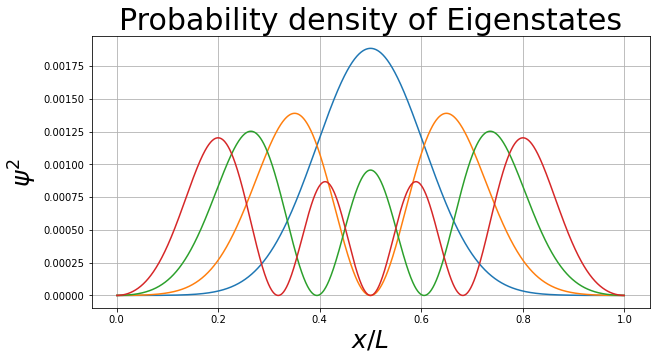

In [21]:
# Plot propability densities of some eigen vectors
plt.figure(figsize=(10,5))

plt.plot(y[1:-1], v.T[0]**2)
plt.plot(y[1:-1], v.T[1]**2)
plt.plot(y[1:-1], v.T[2]**2)
plt.plot(y[1:-1], v.T[3]**2)

plt.title('Probability density of Eigenstates', fontsize=30)
plt.ylabel('$\psi^2$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()

# plt.savefig('', dpi=200)
plt.show()

We were able to obtain the eigenfunctions of a Sturm-Liouville differential operator and solve for the energy eigenstates of a complicated quantum system! As a consistency check lets show that these eigenfunctions are orthogonal (as the Sturm-Liouville theorem guarentees)

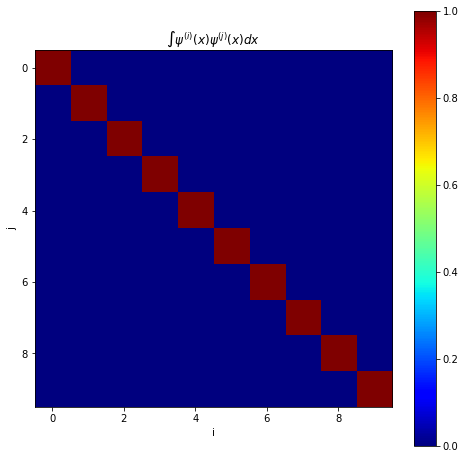

In [33]:
# Get matrix corresponding to integral products
A = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    A[i,j] = sum(v[:,i]*v[:,j]) 

# Plot
plt.figure(figsize=(8,8))

plt.imshow(A, cmap='jet')
plt.colorbar()

plt.title('$\int \psi^{(i)}(x) \psi^{(j)}(x)dx$')
plt.xlabel('i')
plt.ylabel('j')

plt.show()

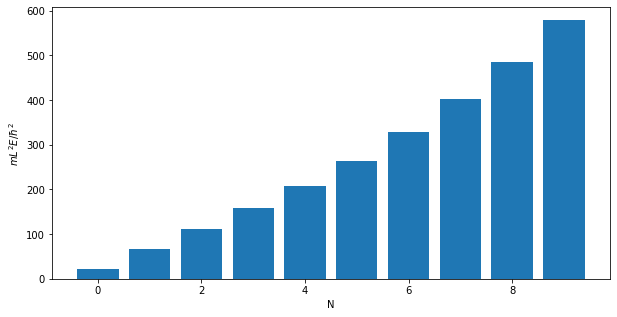

In [23]:
# Plot some energies (eigen values)
plt.figure(figsize=(10,5))
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')
plt.xlabel('N')
plt.show()

## Gaussian potential

In [36]:
def mL2V(y):
  return 1000*np.exp( -(y-0.75)**2 / (2*0.05**2) )

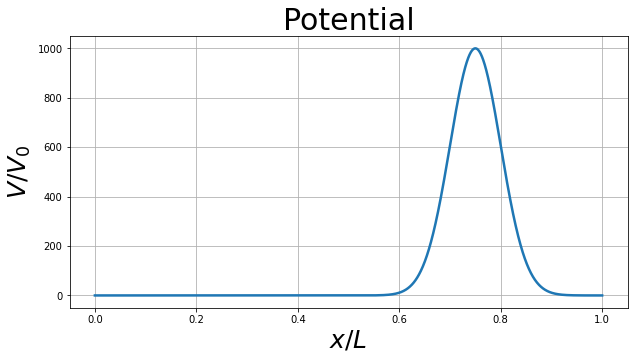

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y, mL2V(y), lw=2.5)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.show()
# plt.savefig('', dpi=200)

In [38]:
d = 1/dy**2 + mL2V(y)[1:-1]           # Main diagnal
e = -1/(2*dy**2) * np.ones(len(d)-1)  # Off-diagnals (symetric)

In [39]:
print(d.shape)
d

(1999,)


array([4000000.        , 4000000.        , 4000000.        , ...,
       4000000.00432781, 4000000.00411776, 4000000.00391753])

In [40]:
print(e.shape)

(1998,)


In [41]:
w, v = eigh_tridiagonal(d, e)

In [42]:
# Eigen values (energy)
w.shape

(1999,)

In [43]:
# Eigen vectors
v.shape

(1999, 1999)

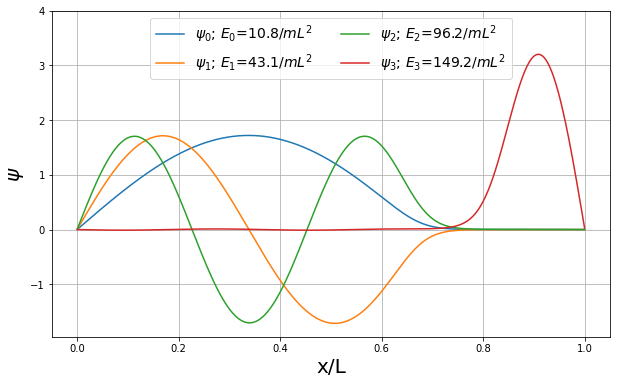

In [46]:
# Normalize Eigenfunction
plt.figure(figsize=(10,6))

v0 = 1 / np.sqrt(sum(v[:,0]**2)*dy) * v[:,0] 
v1 = 1 / np.sqrt(sum(v[:,1]**2)*dy) * v[:,1]
v2 = 1 / np.sqrt(sum(v[:,2]**2)*dy) * v[:,2] 
v3 = 1 / np.sqrt(sum(v[:,3]**2)*dy) * v[:,3]

# Plot
plt.plot(y[1:-1], v0, label='$\psi_0$; $E_0$={:.1f}$/mL^2$'.format(w[0]))
plt.plot(y[1:-1], v1, label='$\psi_1$; $E_1$={:.1f}$/mL^2$'.format(w[1]))
plt.plot(y[1:-1], v2, label='$\psi_2$; $E_2$={:.1f}$/mL^2$'.format(w[2]))
plt.plot(y[1:-1], v3, label='$\psi_3$; $E_3$={:.1f}$/mL^2$'.format(w[3]))
plt.xlabel('x/L', fontsize=20)
plt.ylabel('$\psi$', fontsize=20)
plt.ylim(top=4)
plt.grid()
plt.legend(fontsize=14, ncol=2, loc='upper center')
plt.show()

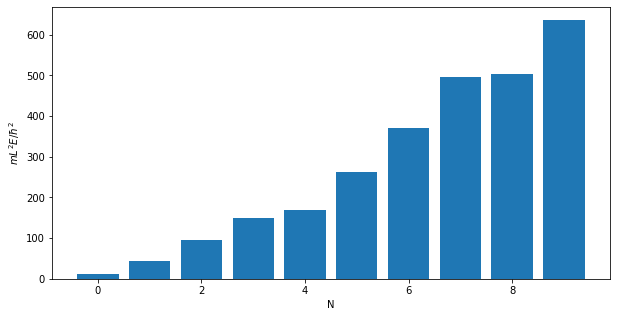

In [47]:
# Plot some energies (eigen values)
plt.figure(figsize=(10,5))
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')
plt.xlabel('N')
plt.show()

The energies do not increase linearly.

## Another potential

In [48]:
def mL2V(y):
  return 1000*np.sin(20*y) * y**4 

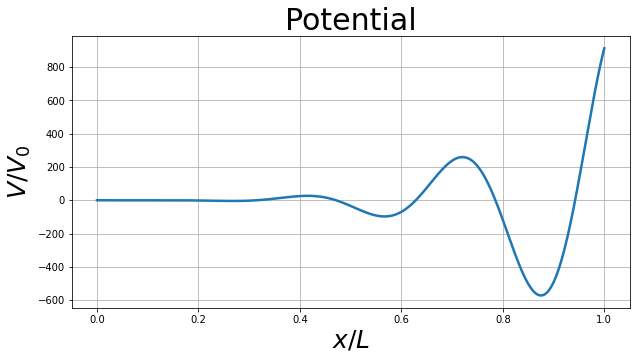

In [49]:
plt.figure(figsize=(10,5))
plt.plot(y, mL2V(y), lw=2.5)
plt.title('Potential', fontsize=30)
plt.ylabel('$V/V_0$', fontsize=25)
plt.xlabel('$x/L$', fontsize=25)
plt.grid()
plt.show()
# plt.savefig('', dpi=200)

In [50]:
d = 1/dy**2 + mL2V(y)[1:-1]           # Main diagnal
e = -1/(2*dy**2) * np.ones(len(d)-1)  # Off-diagnals (symetric)

In [51]:
print(d.shape)
d

(1999,)


array([4000000.        , 4000000.        , 4000000.        , ...,
       4000894.90420944, 4000900.98858834, 4000907.00257631])

In [52]:
print(e.shape)

(1998,)


In [53]:
w, v = eigh_tridiagonal(d, e)

In [54]:
# Eigen values (energy)
w.shape

(1999,)

In [55]:
# Eigen vectors
v.shape

(1999, 1999)

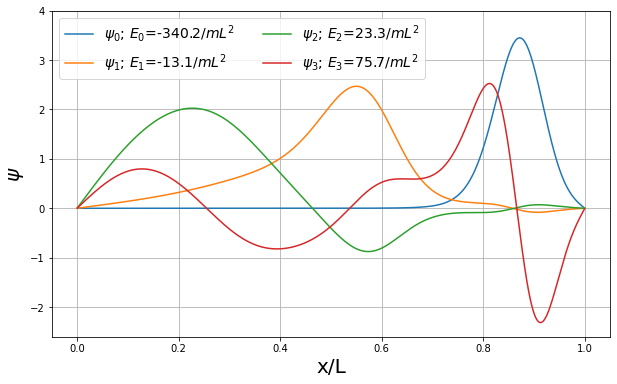

In [58]:
# Normalize Eigenfunction
plt.figure(figsize=(10,6))

v0 = 1 / np.sqrt(sum(v[:,0]**2)*dy) * v[:,0] 
v1 = 1 / np.sqrt(sum(v[:,1]**2)*dy) * v[:,1]
v2 = 1 / np.sqrt(sum(v[:,2]**2)*dy) * v[:,2] 
v3 = 1 / np.sqrt(sum(v[:,3]**2)*dy) * v[:,3]

# Plot
plt.plot(y[1:-1], v0, label='$\psi_0$; $E_0$={:.1f}$/mL^2$'.format(w[0]))
plt.plot(y[1:-1], v1, label='$\psi_1$; $E_1$={:.1f}$/mL^2$'.format(w[1]))
plt.plot(y[1:-1], v2, label='$\psi_2$; $E_2$={:.1f}$/mL^2$'.format(w[2]))
plt.plot(y[1:-1], v3, label='$\psi_3$; $E_3$={:.1f}$/mL^2$'.format(w[3]))
plt.xlabel('x/L', fontsize=20)
plt.ylabel('$\psi$', fontsize=20)
plt.ylim(top=4)
plt.grid()
plt.legend(fontsize=14, ncol=2, loc='upper left')
plt.show()

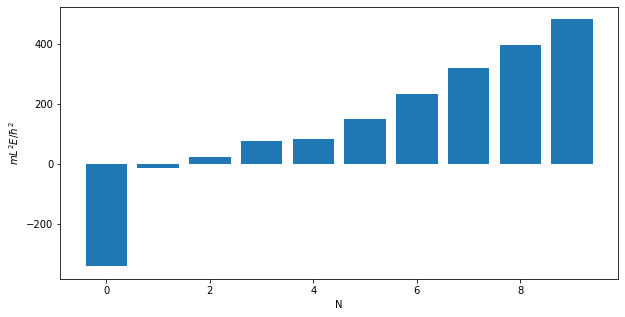

In [59]:
# Plot some energies (eigen values)
plt.figure(figsize=(10,5))
plt.bar(np.arange(0, 10, 1), w[0:10])
plt.ylabel('$mL^2 E/\hbar^2$')
plt.xlabel('N')
plt.show()